In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# 1. Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# 2. Drop customer ID if present
df.drop('customerID', axis=1, inplace=True)

# 3. Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(0, inplace=True)

# 4. Convert categorical to numeric
df = pd.get_dummies(df, drop_first=True)

# 5. Scale numeric columns
scaler = StandardScaler()
cols = ['tenure','MonthlyCharges','TotalCharges']
df[cols] = scaler.fit_transform(df[cols])

# 6. Split features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##applying SMOTE
smote = SMOTE(random_state=42)


X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_balanced.value_counts())


NameError: name 'SMOTE' is not defined

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define simple 2-layer NN
model = models.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer
    layers.Dense(1, activation='sigmoid')                                 # Output layer
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6987 - loss: 0.5710 - val_accuracy: 0.7578 - val_loss: 0.4787
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7661 - loss: 0.4766 - val_accuracy: 0.7844 - val_loss: 0.4394
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7879 - loss: 0.4512 - val_accuracy: 0.7870 - val_loss: 0.4267
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7928 - loss: 0.4419 - val_accuracy: 0.7915 - val_loss: 0.4218
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7943 - loss: 0.4367 - val_accuracy: 0.7924 - val_loss: 0.4187
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.4328 - val_accuracy: 0.7968 - val_loss: 0.4164
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7963 - loss: 0.4304 - val_accuracy: 0.8021 - val_loss: 0.4146
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7954 - loss: 0.4284 - val_accuracy: 0.

In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8084 - loss: 0.3983
Test Accuracy: 80.84%


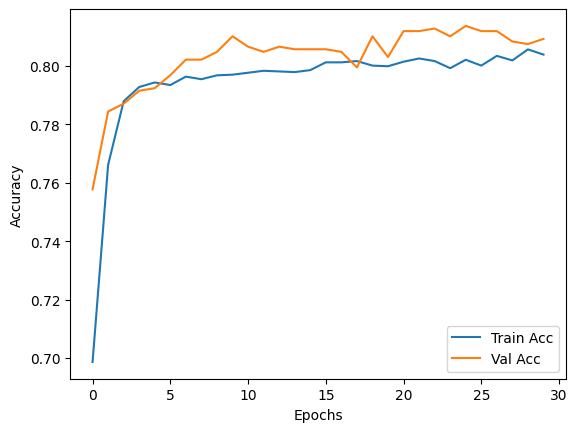

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


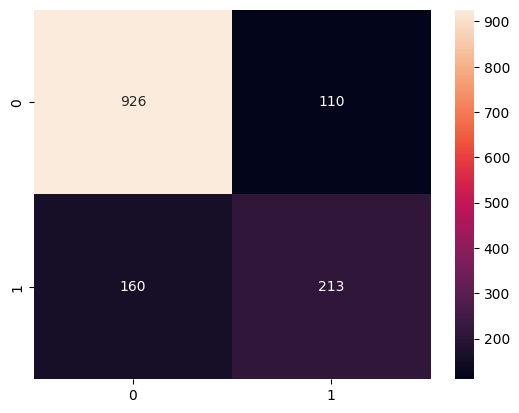

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1036
        True       0.66      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, y_pred))
